# Test response

In [1]:
# input
import numpy as np
import pickle
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        

Nbins = 20

min_theta = 2.5/60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.02


z_column = 'bpz_mean'
z_MC_column = 'bpz_zmc'
e1_column = 'e1'
e2_column = 'e2'



name_folder_x_scalar = '/global/cscratch1/sd/mgatti/Cosmic_shear/response_fmastercat_04_20_100/'

n_jck_scalar = 150  # 1000


name_folder_x = '/global/cscratch1/sd/mgatti/Cosmic_shear/response_fmastercat_04_20_100/'

n_jck = 150  # 1000


sims = False
R_compute = True

z_min_arr = np.array([0]) 
z_max_arr = np.array([5000])  


In [3]:
import numpy as np
def covariance_jck(TOTAL_PHI,jk_r,type_cov):
  if type_cov=='jackknife':
      fact=(jk_r-1.)/(jk_r)

  elif type_cov=='bootstrap':
      fact=1./(jk_r)
  #  Covariance estimation

  average=np.zeros(TOTAL_PHI.shape[0])
  cov_jck=np.zeros((TOTAL_PHI.shape[0],TOTAL_PHI.shape[0]))
  err_jck=np.zeros(TOTAL_PHI.shape[0])


  for kk in range(jk_r):
    average+=TOTAL_PHI[:,kk]
  average=average/(jk_r)

 # print average
  for ii in range(TOTAL_PHI.shape[0]):
     for jj in range(ii+1):
          for kk in range(jk_r):
            cov_jck[jj,ii]+=TOTAL_PHI[ii,kk]*TOTAL_PHI[jj,kk]

          cov_jck[jj,ii]=(-average[ii]*average[jj]*jk_r+cov_jck[jj,ii])*fact
          cov_jck[ii,jj]=cov_jck[jj,ii]

  for ii in range(TOTAL_PHI.shape[0]):
   err_jck[ii]=np.sqrt(cov_jck[ii,ii])
 # print err_jck

  #compute correlation
  corr=np.zeros((TOTAL_PHI.shape[0],TOTAL_PHI.shape[0]))
  for i in range(TOTAL_PHI.shape[0]):
      for j in range(TOTAL_PHI.shape[0]):
        corr[i,j]=cov_jck[i,j]/(np.sqrt(cov_jck[i,i]*cov_jck[j,j]))

  average=average*fact
  return {'cov' : cov_jck,
          'err' : err_jck,
          'corr':corr,
          'mean':average}



def covariance_scalar_jck(TOTAL_PHI,jk_r, type_c = 'jackknife'):

  #  Covariance estimation
  if type_c == 'jackknife':
      fact=(jk_r-1.)/(jk_r)

  elif type_c=='bootstrap':
      fact=1./(jk_r)
        
  average=0.
  cov_jck=0.
  err_jck=0.


  for kk in range(jk_r):
    average+=TOTAL_PHI[kk]
  average=average/(jk_r)

  for kk in range(jk_r):
    #cov_jck+=TOTAL_PHI[kk]#*TOTAL_PHI[kk]

    cov_jck+=(-average+TOTAL_PHI[kk])*(-average+TOTAL_PHI[kk])


  err_jck=np.sqrt(cov_jck*fact)


  #average=average*(jk_r)/(jk_r-1)
  return {'cov' : cov_jck*fact,
          'err' : err_jck,
          'mean': average}

%matplotlib inline
import matplotlib.pyplot as plt

for i,z_min in enumerate(z_min_arr):
    z_min = z_min_arr[i]
    z_max = z_max_arr[i]
    print (" Bin: ",z_min,z_max)
    name_foder = name_folder_x_scalar+'_{0}_{1}/'.format(z_min,z_max)
    normal_response = load_obj(name_foder+'_normal_response') 
    
    R11_1 = normal_response['R11_1']
    R22_1 = normal_response['R22_1']
    R11_2 = normal_response['R11_2']
    R22_2 = normal_response['R22_2']
    print( R11_1,R22_1)

(' Bin: ', 0, 5000)
(0.7176369825673252, 0.7193912919923617)


In [7]:

extra ='_nomean1_'
extra=''
# load response 
tot_dict = dict()
import os
rewrite = True
for i,z_min in enumerate(z_min_arr):
 z_min = z_min_arr[i]
 z_max = z_max_arr[i]
 binx = '{0}_{1}'.format(z_min,z_max)
 print (" Bin: ",z_min,z_max)
 name_output = name_folder_x+'_{0}_{1}/'.format(z_min,z_max)
 pathx = name_output + 'res'
 if rewrite or not os.path.exists(pathx+'.pkl'):
    dgamma = 2 * 0.01
    #**************************************************************************************************************************
    t4_E12_xip = load_obj(name_output+'_0_0_pp_pp'+extra)['corr_jckp']-load_obj(name_output+'_0_0_pm_pm'+extra)['corr_jckp']-load_obj(name_output+'_0_0_mp_mp'+extra)['corr_jckp']+load_obj(name_output+'_0_0_mm_mm'+extra)['corr_jckp']
    t4_E12_xim = load_obj(name_output+'_0_0_pp_pp'+extra)['corr_jckm']-load_obj(name_output+'_0_0_pm_pm'+extra)['corr_jckm']-load_obj(name_output+'_0_0_mp_mp'+extra)['corr_jckm']+load_obj(name_output+'_0_0_mm_mm'+extra)['corr_jckm']

    t4_E1_xip = load_obj(name_output+'_0_0_pp_0'+extra)['corr_jckp']-load_obj(name_output+'_0_0_pm_0'+extra)['corr_jckp']-load_obj(name_output+'_0_0_mp_0'+extra)['corr_jckp']+load_obj(name_output+'_0_0_mm_0'+extra)['corr_jckp']
    t4_E2_xip = load_obj(name_output+'_0_0_0_pp'+extra)['corr_jckp']-load_obj(name_output+'_0_0_0_pm'+extra)['corr_jckp']-load_obj(name_output+'_0_0_0_mp'+extra)['corr_jckp']+load_obj(name_output+'_0_0_0_mm'+extra)['corr_jckp']

    t4_E1_xim = load_obj(name_output+'_0_0_pp_0'+extra)['corr_jckm']-load_obj(name_output+'_0_0_pm_0'+extra)['corr_jckm']-load_obj(name_output+'_0_0_mp_0'+extra)['corr_jckm']+load_obj(name_output+'_0_0_mm_0'+extra)['corr_jckm']
    t4_E2_xim = load_obj(name_output+'_0_0_0_pp'+extra)['corr_jckm']-load_obj(name_output+'_0_0_0_pm'+extra)['corr_jckm']-load_obj(name_output+'_0_0_0_mp'+extra)['corr_jckm']+load_obj(name_output+'_0_0_0_mm'+extra)['corr_jckm']

    #**************************************************************************************************************************
    t3_E12_xip = load_obj(name_output+'_1p2p_0_0p_0p'+extra)['corr_jckp']-load_obj(name_output+'_1m2m_0_0p_0p'+extra)['corr_jckp']-load_obj(name_output+'_1p2p_0_0m_0m'+extra)['corr_jckp']+load_obj(name_output+'_1m2m_0_0m_0m'+extra)['corr_jckp']
    t3_E12_xim = load_obj(name_output+'_1p2p_0_0p_0p'+extra)['corr_jckm']-load_obj(name_output+'_1m2m_0_0p_0p'+extra)['corr_jckm']-load_obj(name_output+'_1p2p_0_0m_0m'+extra)['corr_jckm']+load_obj(name_output+'_1m2m_0_0m_0m'+extra)['corr_jckm']

    t3_E1_xip = load_obj(name_output+'_1p_0_0p_0'+extra)['corr_jckp']-load_obj(name_output+'_1m_0_0p_0'+extra)['corr_jckp']-load_obj(name_output+'_1p_0_0m_0'+extra)['corr_jckp']+load_obj(name_output+'_1m_0_0m_0'+extra)['corr_jckp']
    t3_E2_xip = load_obj(name_output+'_2p_0_0_0p'+extra)['corr_jckp']-load_obj(name_output+'_2m_0_0_0p'+extra)['corr_jckp']-load_obj(name_output+'_2p_0_0_0m'+extra)['corr_jckp']+load_obj(name_output+'_2m_0_0_0m'+extra)['corr_jckp']

    t3_E1_xim = load_obj(name_output+'_1p_0_0p_0'+extra)['corr_jckm']-load_obj(name_output+'_1m_0_0p_0'+extra)['corr_jckm']-load_obj(name_output+'_1p_0_0m_0'+extra)['corr_jckm']+load_obj(name_output+'_1m_0_0m_0'+extra)['corr_jckm']
    t3_E2_xim = load_obj(name_output+'_2p_0_0_0p'+extra)['corr_jckm']-load_obj(name_output+'_2m_0_0_0p'+extra)['corr_jckm']-load_obj(name_output+'_2p_0_0_0m'+extra)['corr_jckm']+load_obj(name_output+'_2m_0_0_0m'+extra)['corr_jckm']

    #**************************************************************************************************************************
    t2_E12_xip = load_obj(name_output+'_0_1p2p_p0_p0'+extra)['corr_jckp']-load_obj(name_output+'_0_1m2m_p0_p0'+extra)['corr_jckp']-load_obj(name_output+'_0_1p2p_m0_m0'+extra)['corr_jckp']+load_obj(name_output+'_0_1m2m_m0_m0'+extra)['corr_jckp']
    t2_E12_xim = load_obj(name_output+'_0_1p2p_p0_p0'+extra)['corr_jckm']-load_obj(name_output+'_0_1m2m_p0_p0'+extra)['corr_jckm']-load_obj(name_output+'_0_1p2p_m0_m0'+extra)['corr_jckm']+load_obj(name_output+'_0_1m2m_m0_m0'+extra)['corr_jckm']

    t2_E1_xip = load_obj(name_output+'_0_1p_p0_0'+extra)['corr_jckp']-load_obj(name_output+'_0_1m_p0_0'+extra)['corr_jckp']-load_obj(name_output+'_0_1p_m0_0'+extra)['corr_jckp']+load_obj(name_output+'_0_1m_m0_0'+extra)['corr_jckp']
    t2_E2_xip = load_obj(name_output+'_0_2p_0_p0'+extra)['corr_jckp']-load_obj(name_output+'_0_2m_0_p0'+extra)['corr_jckp']-load_obj(name_output+'_0_2p_0_m0'+extra)['corr_jckp']+load_obj(name_output+'_0_2m_0_m0'+extra)['corr_jckp']

    t2_E1_xim = load_obj(name_output+'_0_1p_p0_0'+extra)['corr_jckm']-load_obj(name_output+'_0_1m_p0_0'+extra)['corr_jckm']-load_obj(name_output+'_0_1p_m0_0'+extra)['corr_jckm']+load_obj(name_output+'_0_1m_m0_0'+extra)['corr_jckm']
    t2_E2_xim = load_obj(name_output+'_0_2p_0_p0'+extra)['corr_jckm']-load_obj(name_output+'_0_2m_0_p0'+extra)['corr_jckm']-load_obj(name_output+'_0_2p_0_m0'+extra)['corr_jckm']+load_obj(name_output+'_0_2m_0_m0'+extra)['corr_jckm']

    #**************************************************************************************************************************
    t1_E12_xip = load_obj(name_output+'_1p2p_1p2p_0_0'+extra)['corr_jckp']-load_obj(name_output+'_1p2p_1m2m_0_0'+extra)['corr_jckp']-load_obj(name_output+'_1m2m_1p2p_0_0'+extra)['corr_jckp']+load_obj(name_output+'_1m2m_1m2m_0_0'+extra)['corr_jckp']
    t1_E12_xim = load_obj(name_output+'_1p2p_1p2p_0_0'+extra)['corr_jckm']-load_obj(name_output+'_1p2p_1m2m_0_0'+extra)['corr_jckm']-load_obj(name_output+'_1m2m_1p2p_0_0'+extra)['corr_jckm']+load_obj(name_output+'_1m2m_1m2m_0_0'+extra)['corr_jckm']

    t1_E1_xip = load_obj(name_output+'_1p_1p_0_0'+extra)['corr_jckp']-load_obj(name_output+'_1p_1m_0_0'+extra)['corr_jckp']-load_obj(name_output+'_1m_1p_0_0'+extra)['corr_jckp']+load_obj(name_output+'_1m_1m_0_0'+extra)['corr_jckp']
    t1_E2_xip = load_obj(name_output+'_2p_2p_0_0'+extra)['corr_jckp']-load_obj(name_output+'_2p_2m_0_0'+extra)['corr_jckp']-load_obj(name_output+'_2m_2p_0_0'+extra)['corr_jckp']+load_obj(name_output+'_2m_2m_0_0'+extra)['corr_jckp']

    t1_E1_xim = load_obj(name_output+'_1p_1p_0_0'+extra)['corr_jckm']-load_obj(name_output+'_1p_1m_0_0'+extra)['corr_jckm']-load_obj(name_output+'_1m_1p_0_0'+extra)['corr_jckm']+load_obj(name_output+'_1m_1m_0_0'+extra)['corr_jckm']
    t1_E2_xim = load_obj(name_output+'_2p_2p_0_0'+extra)['corr_jckm']-load_obj(name_output+'_2p_2m_0_0'+extra)['corr_jckm']-load_obj(name_output+'_2m_2p_0_0'+extra)['corr_jckm']+load_obj(name_output+'_2m_2m_0_0'+extra)['corr_jckm']

    theta = load_obj(name_output+'_1p_1p_0_0'+extra)['theta']*60.
    
    # full response xip 
    resume = dict()
    resume.update({'xip_R_E1': np.mean((t4_E1_xip + t3_E1_xip + t2_E1_xip + t1_E1_xip)/(dgamma**2),axis=0)})
    resume.update({'xip_R_E2': np.mean((t4_E2_xip + t3_E2_xip + t2_E2_xip + t1_E2_xip)/(dgamma**2),axis=0)})
    resume.update({'xip_R_E12': np.mean((t4_E12_xip + t3_E12_xip + t2_E12_xip )/(2.*dgamma**2),axis=0)})
    
    resume.update({'cov_xip_R_E1': covariance_jck(((t4_E1_xip + t3_E1_xip + t2_E1_xip + t1_E1_xip)/(dgamma**2)).T,n_jck,'jackknife')})
    resume.update({'cov_xip_R_E2': covariance_jck(((t4_E2_xip + t3_E2_xip + t2_E2_xip + t1_E2_xip)/(dgamma**2)).T,n_jck,'jackknife')})
    resume.update({'cov_xip_R_E12': covariance_jck(((t4_E12_xip + t3_E12_xip + t2_E12_xip + t1_E12_xip)/(2.*dgamma**2)).T,n_jck,'jackknife')})

    
    resume.update({'xim_R_E1': np.mean((t4_E1_xim + t3_E1_xim + t2_E1_xim + t1_E1_xim)/(dgamma**2),axis=0)})
    resume.update({'xim_R_E2': np.mean((t4_E2_xim + t3_E2_xim + t2_E2_xim + t1_E2_xim)/(dgamma**2),axis=0)})
    resume.update({'xim_R_E12': np.mean((t4_E12_xim + t3_E12_xim + t2_E12_xim + t1_E12_xim)/(2.*dgamma**2),axis=0) }) 
    
    resume.update({'cov_xim_R_E1': covariance_jck(((t4_E1_xim + t3_E1_xim + t2_E1_xim + t1_E1_xim)/(dgamma**2)).T,n_jck,'jackknife')})
    resume.update({'cov_xim_R_E2': covariance_jck(((t4_E2_xim + t3_E2_xim + t2_E2_xim + t1_E2_xim)/(dgamma**2)).T,n_jck,'jackknife')})
    resume.update({'cov_xim_R_E12': covariance_jck(((t4_E12_xim + t3_E12_xim + t2_E12_xim + t1_E12_xim)/(2.*dgamma**2)).T,n_jck,'jackknife')})

    
    save_obj(pathx, resume)
    tot_dict.update({binx:resume})
 else:
    resume = load_obj(pathx)
    tot_dict.update({binx:resume})
    


(' Bin: ', 0, 5000)


In [46]:
1

1

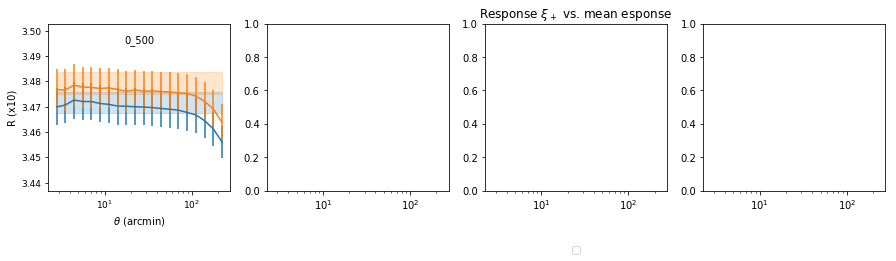

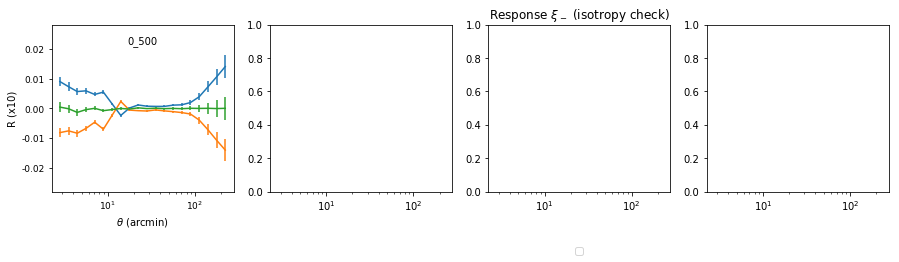

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 4, sharex='all',figsize=(15,4.))#, sharey='row')
pad =0
color1 = 'C0' #u'#1f77b4',
color2 = 'C1'
color3 = 'C2' #u'#ff7f0e'#, u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
from matplotlib.ticker import FormatStrFormatter

    
for i,z_min in enumerate(z_min_arr):
    
    z_min = z_min_arr[i]
    z_max = z_max_arr[i]
    name_foder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max)
    name_foder_scalar = name_folder_x_scalar+'_{0}_{1}/'.format(z_min,z_max)
    
    
    
    binx = '{0}_{1}'.format(z_min,z_max)

    normale_response = load_obj(name_foder_scalar+'_normal_response_meansub') 
    
    R_e1 = np.ones(len(theta))*(normale_response['R11_1']*normale_response['R11_2'])
    R_e2 = np.ones(len(theta))*(normale_response['R22_1']*normale_response['R22_2'])
    #R_tot = np.ones(len(theta))*(normale_response['R_tot'])

    dict_R1=covariance_scalar_jck((normale_response['R11_12_j']),n_jck_scalar)
    dict_R2=covariance_scalar_jck((normale_response['R22_12_j']),n_jck_scalar)
    #dict_R_tot=covariance_scalar_jck((normale_response['R_tot_j']),100)

    ax[2].set_title(r'Response $\xi_+$ vs. mean esponse')#,y=1.1)
    #ax[0,i].plot(theta,R_e1)#,label = 'Y1 R e1')
    ax[i].text(0.5, 0.9, '{0}'.format(binx), horizontalalignment='center',verticalalignment='center', transform=ax[i].transAxes)
    ff = 10
    ax[i].fill_between(theta, ff*R_e1+ff*dict_R1['err'],ff*R_e1-ff*dict_R1['err'], alpha=.2,color = color1,label = r'$<R>^2$ e1')
    #ax[0,i].plot(theta,R_e2)#,label = 'Y1 R e1')
    ax[i].fill_between(theta, ff*R_e2+ff*dict_R2['err'],ff*R_e2-ff*dict_R2['err'], alpha=.2,color = color2,label = r'$<R>^2$ e2')

    #plt.plot(theta,R_tot)#,label = 'Y1 R e1')
    #plt.fill_between(theta, R_tot+dict_R_tot['err'],R_tot-dict_R_tot['err'], alpha=.1,label = 'Y1 R**2 (e1e2 mean)')

    #ax[0,i]t.errorbar(theta, tot_dict[binx]['xip_R_E12'], tot_dict[binx]['cov_xip_R_E12']['err'],label = 'R_xi+ e1e2')
    ax[i].errorbar(theta, ff*tot_dict[binx]['xip_R_E1'], ff*tot_dict[binx]['cov_xip_R_E1']['err'],label = r'$R{\xi_+}$ e1',color = color1)
    ax[i].errorbar(theta, ff*tot_dict[binx]['xip_R_E2'], ff*tot_dict[binx]['cov_xip_R_E2']['err'], label = r'$R{\xi_+}$ e2',color = color2)

#plt.errorbar(theta+theta/10., tot_dict[binx]['cov_xip_R_E1']['mean']*100./99., tot_dict[binx]['cov_xip_R_E1']['err'], label = 'R_xi+ e2')
    ax[i].set_xlabel(r'$\theta$ (arcmin)')
    ax[0].set_ylabel('R (x10)')
    
    miny = min([min(tot_dict[binx]['xip_R_E2']),min(tot_dict[binx]['xip_R_E1']),min(R_e2-dict_R2['err']),min(R_e1-dict_R1['err'])])
    maxy = max([max(tot_dict[binx]['xip_R_E2']),max(tot_dict[binx]['xip_R_E1']),max(R_e2+dict_R2['err']),max(R_e1+dict_R1['err'])])
 
    dm = ff*(maxy-miny)*0.7
    ax[i].set_ylim(ff*miny-dm,dm+ ff*maxy)
    #plt.tight_layout()
    plt.xscale('log', nonposx='clip')
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=9)
    #ax[4].legend(loc='upper right', bbox_to_anchor=(2., .9), ncol=1)
    ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4)
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('xip_final.pdf')
plt.show()
f, ax = plt.subplots(1, 4, sharex='all',figsize=(15,4.))#, sharey='row')

for i,z_min in enumerate(z_min_arr):
    
    z_min = z_min_arr[i]
    z_max = z_max_arr[i]
    name_foder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max)
    name_foder_scalar = name_folder_x_scalar+'_{0}_{1}/'.format(z_min,z_max)
    
    name_foder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max)
    binx = '{0}_{1}'.format(z_min,z_max)

    normale_response = load_obj(name_foder_scalar+'_normal_response_meansub') 
    
    R_e1 = np.ones(len(theta))*(normale_response['R11_1']*normale_response['R11_2'])
    R_e2 = np.ones(len(theta))*(normale_response['R22_1']*normale_response['R22_2'])
    #R_tot = np.ones(len(theta))*(normale_response['R_tot'])

    dict_R1=covariance_scalar_jck((normale_response['R11_12_j']),n_jck_scalar)
    dict_R2=covariance_scalar_jck((normale_response['R22_12_j']),n_jck_scalar)
    #dict_R_tot=covariance_scalar_jck((normale_response['R_tot_j']),100)

    ax[2].set_title(r'Response $\xi_-$ (isotropy check)')#,y=1.1)
    #ax[0,i].plot(theta,R_e1)#,label = 'Y1 R e1')
    #ax[i].set_title('{0}'.format(binx))#,pad =pad)
    ax[0].set_ylabel('R (x10)')
    ax[i].text(0.5, 0.9, '{0}'.format(binx), horizontalalignment='center',verticalalignment='center', transform=ax[i].transAxes)
    
    ax[i].errorbar(theta, ff*tot_dict[binx]['xim_R_E1'], ff*tot_dict[binx]['cov_xim_R_E1']['err'],label = r'$R{\xi_-}$ e1',color = color1)
    ax[i].errorbar(theta, ff*tot_dict[binx]['xim_R_E2'],ff* tot_dict[binx]['cov_xim_R_E1']['err'], label = r'$R{\xi_-}$ e2',color = color2)
    ax[i].errorbar(theta, 0.5*(ff*tot_dict[binx]['xim_R_E1']+ff*tot_dict[binx]['xim_R_E2']), 0.5*ff*(tot_dict[binx]['cov_xim_R_E1']['err']+tot_dict[binx]['cov_xim_R_E2']['err']), label = r'$R{\xi_-}$ mean',color = color3)
    ax[i].set_xlabel(r'$\theta$ (arcmin)')
    
    miny = min([min(tot_dict[binx]['xim_R_E2']),min(tot_dict[binx]['xim_R_E1'])])
    maxy = max([max(tot_dict[binx]['xim_R_E2']),max(tot_dict[binx]['xim_R_E1'])])
 
    
    ax[i].set_ylim(2*ff*miny,2* ff*maxy)
    #plt.tight_layout()
    plt.xscale('log', nonposx='clip')
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=9)
    #plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.8), ncol=1)
    ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('xim_final.pdf')
plt.show()


In [10]:
n_jck

150

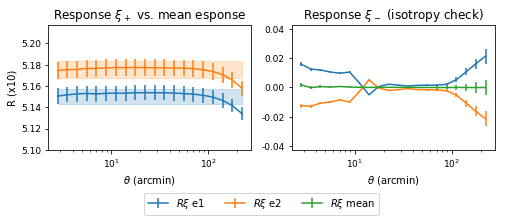

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 2, sharex='all',figsize=(8,3.))#, sharey='row')
pad =0
color1 = 'C0' #u'#1f77b4',
color2 = 'C1'
color3 = 'C2' #u'#ff7f0e'#, u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
from matplotlib.ticker import FormatStrFormatter

    
for i,z_min in enumerate(z_min_arr):
    
    z_min = z_min_arr[i]
    z_max = z_max_arr[i]
    name_foder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max)
    binx = '{0}_{1}'.format(z_min,z_max)
    name_foder_scalar = name_folder_x_scalar+'_{0}_{1}/'.format(z_min,z_max)
    
    normale_response = load_obj(name_foder_scalar+'_normal_response') 
    
    R_e1 = np.ones(len(theta))*(normale_response['R11_1']*normale_response['R11_2'])
    R_e2 = np.ones(len(theta))*(normale_response['R22_1']*normale_response['R22_2'])
    #R_tot = np.ones(len(theta))*(normale_response['R_tot'])

    dict_R1=covariance_scalar_jck((normale_response['R11_12_j']),n_jck_scalar)
    dict_R2=covariance_scalar_jck((normale_response['R22_12_j']),n_jck_scalar)
    #dict_R_tot=covariance_scalar_jck((normale_response['R_tot_j']),100)

    ax[0].set_title(r'Response $\xi_+$ vs. mean esponse')#,y=1.1)
    #ax[0,i].plot(theta,R_e1)#,label = 'Y1 R e1')
    ff = 10
    ax[0].fill_between(theta, ff*R_e1+ff*dict_R1['err'],ff*R_e1-ff*dict_R1['err'], alpha=.2,color = color1,label = r'$<R>^2$ e1')
    #ax[0,i].plot(theta,R_e2)#,label = 'Y1 R e1')
    ax[0].fill_between(theta, ff*R_e2+ff*dict_R2['err'],ff*R_e2-ff*dict_R2['err'], alpha=.2,color = color2,label = r'$<R>^2$ e2')

    #plt.plot(theta,R_tot)#,label = 'Y1 R e1')
    #plt.fill_between(theta, R_tot+dict_R_tot['err'],R_tot-dict_R_tot['err'], alpha=.1,label = 'Y1 R**2 (e1e2 mean)')

    #ax[0,i]t.errorbar(theta, tot_dict[binx]['xip_R_E12'], tot_dict[binx]['cov_xip_R_E12']['err'],label = 'R_xi+ e1e2')
    ax[0].errorbar(theta, ff*tot_dict[binx]['xip_R_E1'], ff*tot_dict[binx]['cov_xip_R_E1']['err'],label = r'$R{\xi_+}$ e1',color = color1)
    ax[0].errorbar(theta, ff*tot_dict[binx]['xip_R_E2'], ff*tot_dict[binx]['cov_xip_R_E2']['err'], label = r'$R{\xi_+}$ e2',color = color2)

#plt.errorbar(theta+theta/10., tot_dict[binx]['cov_xip_R_E1']['mean']*100./99., tot_dict[binx]['cov_xip_R_E1']['err'], label = 'R_xi+ e2')
    ax[0].set_xlabel(r'$\theta$ (arcmin)')
    ax[0].set_ylabel('R (x10)')
    
    miny = min([min(tot_dict[binx]['xip_R_E2']),min(tot_dict[binx]['xip_R_E1']),min(R_e2-dict_R2['err']),min(R_e1-dict_R1['err'])])
    maxy = max([max(tot_dict[binx]['xip_R_E2']),max(tot_dict[binx]['xip_R_E1']),max(R_e2+dict_R2['err']),max(R_e1+dict_R1['err'])])
 
    dm = ff*(maxy-miny)*0.7
    ax[0].set_ylim(ff*miny-dm,dm+ ff*maxy)
    #plt.tight_layout()
    plt.xscale('log', nonposx='clip')
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=9)
    #ax[4].legend(loc='upper right', bbox_to_anchor=(2., .9), ncol=1)
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4)

for i,z_min in enumerate(z_min_arr):
    
    z_min = z_min_arr[i]
    z_max = z_max_arr[i]
    name_foder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max)
    binx = '{0}_{1}'.format(z_min,z_max)

    normale_response = load_obj(name_foder_scalar+'_normal_response') 
    name_foder_scalar = name_folder_x_scalar+'_{0}_{1}/'.format(z_min,z_max)
    
    R_e1 = np.ones(len(theta))*(normale_response['R11_1']*normale_response['R11_2'])
    R_e2 = np.ones(len(theta))*(normale_response['R22_1']*normale_response['R22_2'])
    #R_tot = np.ones(len(theta))*(normale_response['R_tot'])

    dict_R1=covariance_scalar_jck((normale_response['R11_12_j']),n_jck_scalar)
    dict_R2=covariance_scalar_jck((normale_response['R22_12_j']),n_jck_scalar)
    #dict_R_tot=covariance_scalar_jck((normale_response['R_tot_j']),100)

    ax[1].set_title(r'Response $\xi_-$ (isotropy check)')#,y=1.1)
    #ax[0,i].plot(theta,R_e1)#,label = 'Y1 R e1')
    #ax[i].set_title('{0}'.format(binx))#,pad =pad)

    ax[1].errorbar(theta, ff*tot_dict[binx]['xim_R_E1'], ff*tot_dict[binx]['cov_xim_R_E1']['err'],label = r'$R{\xi}$ e1',color = color1)
    ax[1].errorbar(theta, ff*tot_dict[binx]['xim_R_E2'],ff* tot_dict[binx]['cov_xim_R_E1']['err'], label = r'$R{\xi}$ e2',color = color2)
    ax[1].errorbar(theta, 0.5*(ff*tot_dict[binx]['xim_R_E1']+ff*tot_dict[binx]['xim_R_E2']), 0.5*ff*(tot_dict[binx]['cov_xim_R_E1']['err']+tot_dict[binx]['cov_xim_R_E2']['err']), label = r'$R{\xi}$ mean',color = color3)
    #ax[1].errorbar(theta, (ff*tot_dict[binx]['xim_R_E12']), ff*(tot_dict[binx]['cov_xim_R_E12']['err']), label = r'$R{\xi}$ mean',color = color3)
    
    ax[1].set_xlabel(r'$\theta$ (arcmin)')
    
    miny = min([min(tot_dict[binx]['xim_R_E2']),min(tot_dict[binx]['xim_R_E1'])])
    maxy = max([max(tot_dict[binx]['xim_R_E2']),max(tot_dict[binx]['xim_R_E1'])])
 
    
    ax[1].set_ylim(2*ff*miny,2* ff*maxy)
    #plt.tight_layout()
    plt.xscale('log', nonposx='clip')
    ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[1].tick_params(labelsize=9)
    #plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.8), ncol=1)
    ax[1].legend(loc='upper center', bbox_to_anchor=(-0.15, -0.3), ncol=3)
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('xip_tot.pdf',bbox_inches='tight')
plt.show()


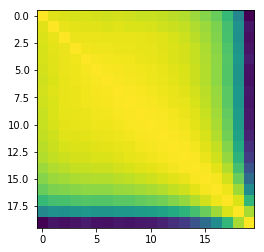

In [29]:
plt.imshow(tot_dict[binx]['cov_xip_R_E1']['corr'])

In [27]:
(0.7176500844536258- 0.7193847860454086)/0.7193847860454086*100

-0.24113681932568667

In [81]:
t = R_e1*np.ones(len(tot_dict[binx]['xip_R_E1'])  )
y = tot_dict[binx]['xip_R_E1']
cov = tot_dict[binx]['cov_xip_R_E1']['cov']

In [82]:
from scipy import stats
maxx=25
ww = (t-y)[:maxx]
chi2_red = np.matmul(ww , np.matmul(np.linalg.inv(cov[:maxx,:maxx]),ww ))/len(ww)

ff=1.
from scipy import special
def p2s(p):
    return np.sqrt(2.)*special.erfinv((1-p))

p = 1 - stats.t.cdf(chi2_red*ff,df=len(ww))
p=1 - stats.chi2.cdf(chi2_red*ff*len(ww),df=len(ww))
print p2s(p),p

inf 0.0


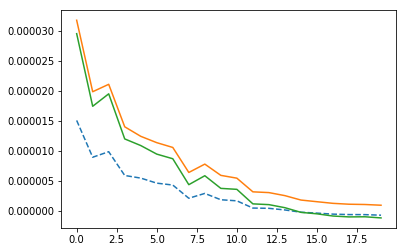

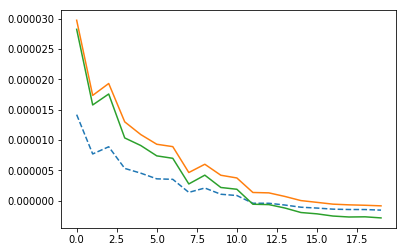

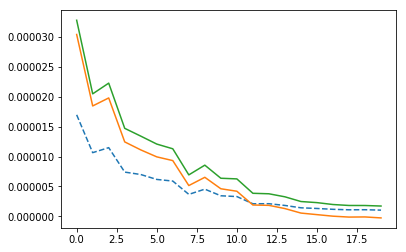

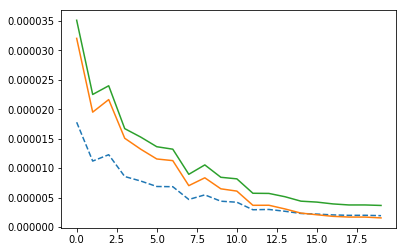

In [32]:
    '''
    binx = '0.2_0.43'
    t4_E12_xip = load_obj(name_output+'_0_0_pp_pp')['corr_jckp']-load_obj(name_output+'_0_0_pm_pm')['corr_jckp']-load_obj(name_output+'_0_0_mp_mp')['corr_jckp']+load_obj(name_output+'_0_0_mm_mm')['corr_jckp']
    t4_E1_xip = load_obj(name_output+'_0_0_pp_0')['corr_jckp']-load_obj(name_output+'_0_0_pm_0')['corr_jckp']-load_obj(name_output+'_0_0_mp_0')['corr_jckp']+load_obj(name_output+'_0_0_mm_0')['corr_jckp']
    t4_E2_xip = load_obj(name_output+'_0_0_0_pp')['corr_jckp']-load_obj(name_output+'_0_0_0_pm')['corr_jckp']-load_obj(name_output+'_0_0_0_mp')['corr_jckp']+load_obj(name_output+'_0_0_0_mm')['corr_jckp']
    plt.plot(np.mean(t4_E12_xip,axis=0)/2., linestyle ='dashed')
    plt.plot(np.mean(t4_E2_xip,axis=0))
    plt.plot(np.mean(t4_E1_xip,axis=0))
    
    plt.show()
    binx = '0.2_0.43'
    t1_E12_xip = load_obj(name_output+'_1p2p_1p2p_0_0')['corr_jckp']-load_obj(name_output+'_1p2p_1m2m_0_0')['corr_jckp']-load_obj(name_output+'_1m2m_1p2p_0_0')['corr_jckp']+load_obj(name_output+'_1m2m_1m2m_0_0')['corr_jckp']

    t1_E1_xip = load_obj(name_output+'_1p_1p_0_0')['corr_jckp']-load_obj(name_output+'_1p_1m_0_0')['corr_jckp']-load_obj(name_output+'_1m_1p_0_0')['corr_jckp']+load_obj(name_output+'_1m_1m_0_0')['corr_jckp']
    t1_E2_xip = load_obj(name_output+'_2p_2p_0_0')['corr_jckp']-load_obj(name_output+'_2p_2m_0_0')['corr_jckp']-load_obj(name_output+'_2m_2p_0_0')['corr_jckp']+load_obj(name_output+'_2m_2m_0_0')['corr_jckp']
    
    plt.plot(np.mean(t1_E12_xip,axis=0)/2., linestyle ='dashed')
    plt.plot(np.mean(t1_E2_xip,axis=0))
    plt.plot(np.mean(t1_E1_xip,axis=0))
    plt.show()
    '''
    varr = 'corr_jckp'
    
    t2_E12_xip =load_obj(name_output+'_0_1m2m_m0_m0')[varr]
    t2_E1_xip = load_obj(name_output+'_0_1m_m0_0')[varr]
    t2_E2_xip = load_obj(name_output+'_0_2m_0_m0')[varr]
    plt.plot(np.mean(t2_E12_xip,axis=0)/2., linestyle ='dashed')
    plt.plot(np.mean(t2_E2_xip,axis=0))
    plt.plot(np.mean(t2_E1_xip,axis=0))
    plt.show()
    
    t2_E12_xip = load_obj(name_output+'_0_1p2p_m0_m0')[varr]#+load_obj(name_output+'_0_1m2m_m0_m0')['corr_jckp']
    t2_E1_xip = load_obj(name_output+'_0_1p_m0_0')[varr]#+load_obj(name_output+'_0_1m_m0_0')['corr_jckp']
    t2_E2_xip = load_obj(name_output+'_0_2p_0_m0')[varr]#+load_obj(name_output+'_0_2m_0_m0')['corr_jckp']
    plt.plot(np.mean(t2_E12_xip,axis=0)/2., linestyle ='dashed')
    plt.plot(np.mean(t2_E2_xip,axis=0))
    plt.plot(np.mean(t2_E1_xip,axis=0))
    plt.show()
    
    t2_E12_xip = load_obj(name_output+'_0_1m2m_p0_p0')[varr]#-load_obj(name_output+'_0_1p2p_m0_m0')['corr_jckp']+load_obj(name_output+'_0_1m2m_m0_m0')['corr_jckp']
    t2_E1_xip = load_obj(name_output+'_0_1m_p0_0')[varr]#-load_obj(name_output+'_0_1p_m0_0')['corr_jckp']+load_obj(name_output+'_0_1m_m0_0')['corr_jckp']
    t2_E2_xip = load_obj(name_output+'_0_2m_0_p0')[varr]#-load_obj(name_output+'_0_2p_0_m0')['corr_jckp']+load_obj(name_output+'_0_2m_0_m0')['corr_jckp']
    plt.plot(np.mean(t2_E12_xip,axis=0)/2., linestyle ='dashed')
    plt.plot(np.mean(t2_E2_xip,axis=0))
    plt.plot(np.mean(t2_E1_xip,axis=0))
    plt.show()
    
    t2_E12_xip = load_obj(name_output+'_0_1p2p_p0_p0')[varr]#-load_obj(name_output+'_0_1m2m_p0_p0')['corr_jckp']-load_obj(name_output+'_0_1p2p_m0_m0')['corr_jckp']+load_obj(name_output+'_0_1m2m_m0_m0')['corr_jckp']
    t2_E1_xip = load_obj(name_output+'_0_1p_p0_0')[varr]#-load_obj(name_output+'_0_1m_p0_0')['corr_jckp']-load_obj(name_output+'_0_1p_m0_0')['corr_jckp']+load_obj(name_output+'_0_1m_m0_0')['corr_jckp']
    t2_E2_xip = load_obj(name_output+'_0_2p_0_p0')[varr]#-load_obj(name_output+'_0_2m_0_p0')['corr_jckp']-load_obj(name_output+'_0_2p_0_m0')['corr_jckp']+load_obj(name_output+'_0_2m_0_m0')['corr_jckp']
    plt.plot(np.mean(t2_E12_xip,axis=0)/2., linestyle ='dashed')
    plt.plot(np.mean(t2_E2_xip,axis=0))
    plt.plot(np.mean(t2_E1_xip,axis=0))
    plt.show()

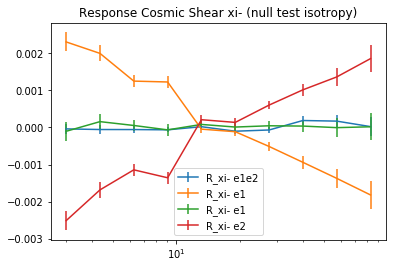

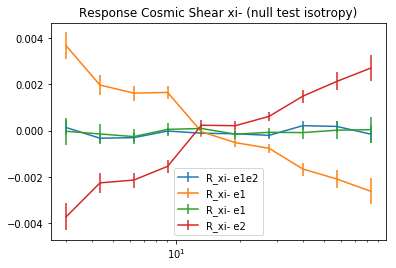

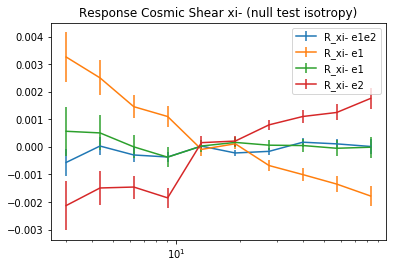

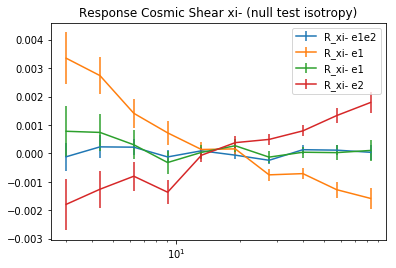

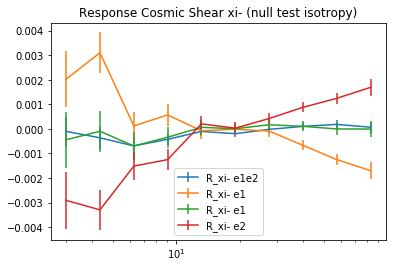

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
for i,z_min in enumerate(z_min_arr):
    
    z_min = z_min_arr[i]
    z_max = z_max_arr[i]
    name_foder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max)
    binx = '{0}_{1}'.format(z_min,z_max)


    plt.errorbar(theta, tot_dict[binx]['xim_R_E12'], tot_dict[binx]['cov_xim_R_E12']['err'],label = 'R_xi- e1e2')
    plt.errorbar(theta, tot_dict[binx]['xim_R_E1'], tot_dict[binx]['cov_xim_R_E1']['err'],label = 'R_xi- e1')
    plt.errorbar(theta, 0.5*(tot_dict[binx]['xim_R_E1']+tot_dict[binx]['xim_R_E2']), tot_dict[binx]['cov_xim_R_E1']['err'],label = 'R_xi- e1')
    
    plt.errorbar(theta, tot_dict[binx]['xim_R_E2'], tot_dict[binx]['cov_xim_R_E1']['err'], label = 'R_xi- e2')
    
    plt.xscale('log', nonposx='clip')
    plt.title('Response Cosmic Shear xi- (null test isotropy)')
    plt.legend()
    plt.show()



In [84]:
(covariance_jck((t4_E1_xip/(dgamma**2)).T,100,'jackknife')['err'])

array([ 0.00114378,  0.00115167,  0.00114339,  0.00115225,  0.00113609,
        0.00112823,  0.0011175 ,  0.00109995,  0.00105639,  0.0009809 ])

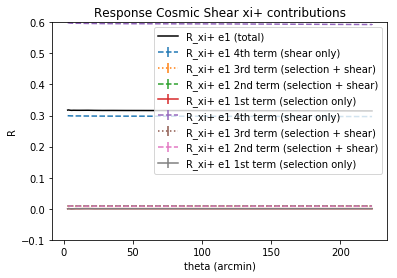

In [32]:
theta = load_obj(name_output+'_1p_1p_0_0')['theta']*60.

R = np.ones(len(theta))*((R11_1 + R22_1) * (R11_2 + R22_2) / 4.)

# full response xip 
xip_R_E1 = (t4_E1_xip + t3_E1_xip + t2_E1_xip + t1_E1_xip)/(dgamma**2)

plt.plot(theta,np.mean(xip_R_E1,axis=0), label = 'R_xi+ e1 (total)',color='black')
plt.errorbar(theta, np.mean(t4_E1_xip/(dgamma**2),axis=0), (covariance_jck((t4_E1_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 4th term (shear only)',linestyle ='dashed')
plt.errorbar(theta, np.mean(t3_E1_xip/(dgamma**2),axis=0),(covariance_jck((t3_E1_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 3rd term (selection + shear)',linestyle ='dotted')
plt.errorbar(theta, np.mean(t2_E1_xip/(dgamma**2),axis=0),(covariance_jck((t2_E1_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 2nd term (selection + shear)',linestyle ='dashed')
plt.errorbar(theta, np.mean(t1_E1_xip/(dgamma**2),axis=0),(covariance_jck((t1_E1_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 1st term (selection only)')


plt.errorbar(theta, np.mean(t4_E12_xip/(dgamma**2),axis=0), (covariance_jck((t4_E12_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 4th term (shear only)',linestyle ='dashed')
plt.errorbar(theta, np.mean(t3_E12_xip/(dgamma**2),axis=0),(covariance_jck((t3_E12_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 3rd term (selection + shear)',linestyle ='dotted')
plt.errorbar(theta, np.mean(t2_E12_xip/(dgamma**2),axis=0),(covariance_jck((t2_E12_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 2nd term (selection + shear)',linestyle ='dashed')
plt.errorbar(theta, np.mean(t1_E12_xip/(dgamma**2),axis=0),(covariance_jck((t1_E12_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 1st term (selection only)')




plt.ylim([-0.1,0.6])
plt.ylabel('R')
plt.xlabel('theta (arcmin)')
plt.legend()

plt.title('Response Cosmic Shear xi+ contributions')

plt.savefig(name_output+'response_xip_total.png')

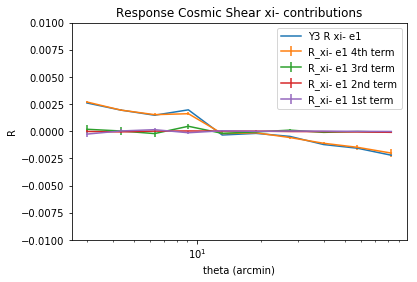

In [105]:
theta = load_obj(name_output+'_1p_1p_0_0')['theta']*60.

R = np.ones(len(theta))*((R11_1 + R22_1) * (R11_2 + R22_2) / 4.)

# full response xip 
xim_R_E1 = (t4_E1_xim + t3_E1_xim + t2_E1_xim + t1_E1_xim)/(dgamma**2)

plt.plot(theta,np.mean(xim_R_E1,axis=0), label = 'Y3 R xi- e1 ')
plt.errorbar(theta, np.mean(t4_E1_xim/(dgamma**2),axis=0),(covariance_jck((t4_E1_xim/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi- e1 4th term')
plt.errorbar(theta, np.mean(t3_E1_xim/(dgamma**2),axis=0),(covariance_jck((t3_E1_xim/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi- e1 3rd term')
plt.errorbar(theta, np.mean(t2_E1_xim/(dgamma**2),axis=0),(covariance_jck((t2_E1_xim/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi- e1 2nd term')
plt.errorbar(theta, np.mean(t1_E1_xim/(dgamma**2),axis=0),(covariance_jck((t1_E1_xim/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi- e1 1st term')


plt.ylim([-0.01,0.01])
plt.ylabel('R')
plt.xlabel('theta (arcmin)')
plt.legend()
area = (ramax-ramin)*(decmax-decmin)
plt.title('Response Cosmic Shear xi- contributions')
plt.xscale('log', nonposy='clip')
plt.savefig(name_output+'response_xip_total.png')

In [94]:
100*(xip_R_E2-R_e2)/R_e2

array([ 0.1464303 ,  0.21581334,  0.10017041,  0.1247718 ,  0.10253893,
        0.11791207,  0.1115779 ,  0.108373  ,  0.16748474,  0.2176876 ])

In [25]:
R11_1,R22_2

(0.67859478476113788, 0.6532541455236508)

In [ ]:
t2_E12_xim = load_obj(name_output+'_0_1p2p_p0_p0')['corr_jckm']-load_obj(name_output+'_0_1m2m_p0_p0')['corr_jckm']-load_obj(name_output+'_0_1p2p_m0_m0')['corr_jckm']+load_obj(name_output+'_0_1m2m_m0_m0')['corr_jckm']
    t2_E2_xip = load_obj(name_output+'_0_2p_0_p0')['corr_jckp']-load_obj(name_output+'_0_2m_0_p0')['corr_jckp']-load_obj(name_output+'_0_2p_0_m0')['corr_jckp']+load_obj(name_output+'_0_2m_0_m0')['corr_jckp']


In [57]:
load_obj(name_output+'_0_1p2p_p0_p0')['xip'][0]/load_obj(name_output+'_0_2p_0_p0')['xip'][0]

1.1107329961239276

In [ ]:
plt.errorbar(theta, np.mean(t4_E1_xip/(dgamma**2),axis=0), (covariance_jck((t4_E1_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 4th term (shear only)',linestyle ='dashed')
plt.errorbar(theta, np.mean(t3_E1_xip/(dgamma**2),axis=0),(covariance_jck((t3_E1_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 3rd term (selection + shear)',linestyle ='dotted')
plt.errorbar(theta, np.mean(t2_E1_xip/(dgamma**2),axis=0),(covariance_jck((t2_E1_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 2nd term (selection + shear)',linestyle ='dashed')
plt.errorbar(theta, np.mean(t1_E1_xip/(dgamma**2),axis=0),(covariance_jck((t1_E1_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 1st term (selection only)')


plt.errorbar(theta, np.mean(t4_E12_xip/(dgamma**2),axis=0), (covariance_jck((t4_E12_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 4th term (shear only)',linestyle ='dashed')
plt.errorbar(theta, np.mean(t3_E12_xip/(dgamma**2),axis=0),(covariance_jck((t3_E12_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 3rd term (selection + shear)',linestyle ='dotted')
plt.errorbar(theta, np.mean(t2_E12_xip/(dgamma**2),axis=0),(covariance_jck((t2_E12_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 2nd term (selection + shear)',linestyle ='dashed')
plt.errorbar(theta, np.mean(t1_E12_xip/(dgamma**2),axis=0),(covariance_jck((t1_E12_xip/(dgamma**2)).T,100,'jackknife')['err']), label = 'R_xi+ e1 1st term (selection only)')


In [72]:
from matplotlib.ticker import FormatStrFormatter

    
for i,z_min in enumerate(z_min_arr):
    
    z_min = z_min_arr[i]
    z_max = z_max_arr[i]
    name_foder = name_folder_x+'_{0}_{1}/'.format(z_min,z_max)
    binx = '{0}_{1}'.format(z_min,z_max)

    normale_response = load_obj(name_foder+'_normal_response') 
    
    R_e1 = np.ones(len(theta))*(normale_response['R11_1']*normale_response['R11_2'])
    R_e2 = np.ones(len(theta))*(normale_response['R22_1']*normale_response['R22_2'])
    #R_tot = np.ones(len(theta))*(normale_response['R_tot'])

    dict_R1=covariance_scalar_jck((normale_response['R11_12_j']),n_jck)
    dict_R2=covariance_scalar_jck((normale_response['R22_12_j']),n_jck)
    #dict_R_tot=covariance_scalar_jck((normale_response['R_tot_j']),100)

    print (tot_dict[binx]['cov_xip_R_E1']['err'][0],dict_R2['err'],dict_R2['mean'],R_e2[0])
    
    

0.000817520226841 0.000756501389736 0.577851233117 0.577851231484
0.000960528772631 0.00397517052479 0.415387188124 0.415803808634
0.000932766507623 0.00350418592011 0.371727684917 0.372100269001
0.00100262987479 0.00303621859744 0.315438722518 0.31575450174


In [82]:
normale_response.keys()

dict_keys(['R11_12_j', 'R_tot', 'R_tot_j', 'R22_12_j', 'R22_2', 'R22_1', 'R11_1', 'R11_2'])

In [81]:
normale_response['R_tot']

0.31579072557843185

1.05950848578
35.4889517517
35.4889517517
1102.26543644


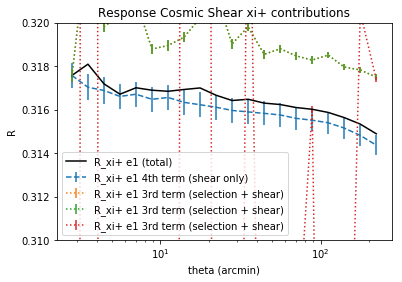

In [30]:
theta = load_obj(name_output+'_1p_1p_0_0')['theta']*60.

R = np.ones(len(theta))*((R11_1 + R22_1) * (R11_2 + R22_2) / 4.)

# full response xip 
xip_R_E1 = (t4_E1_xip + t3_E1_xip + t2_E1_xip + t1_E1_xip)/(dgamma**2)

plt.plot(theta,np.mean(xip_R_E1,axis=0), label = 'R_xi+ e1 (total)',color='black')


fact = (np.mean(xip_R_E1,axis=0)/np.mean(t4_E1_xip/(dgamma**2),axis=0))[0]
print  (fact)

plt.errorbar(theta, fact*np.mean(t4_E1_xip/(dgamma**2),axis=0), (covariance_jck((t4_E1_xip/(dgamma**2)).T,1000,'jackknife')['err']), label = 'R_xi+ e1 4th term (shear only)',linestyle ='dashed')

fact = (np.mean(xip_R_E1,axis=0)/np.mean(t3_E1_xip/(dgamma**2),axis=0))[0]
print  (fact)
plt.errorbar(theta, fact*np.mean(t3_E1_xip/(dgamma**2),axis=0),(covariance_jck((t3_E1_xip/(dgamma**2)).T,1000,'jackknife')['err']), label = 'R_xi+ e1 3rd term (selection + shear)',linestyle ='dotted')

fact = (np.mean(xip_R_E1,axis=0)/np.mean(t2_E1_xip/(dgamma**2),axis=0))[0]
print  (fact)
plt.errorbar(theta, fact*np.mean(t2_E1_xip/(dgamma**2),axis=0),(covariance_jck((t3_E1_xip/(dgamma**2)).T,1000,'jackknife')['err']), label = 'R_xi+ e1 3rd term (selection + shear)',linestyle ='dotted')


fact = (np.mean(xip_R_E1,axis=0)/np.mean(t1_E1_xip/(dgamma**2),axis=0))[15]
print  (fact)
plt.errorbar(theta, fact*np.mean(t1_E1_xip/(dgamma**2),axis=0),(covariance_jck((t3_E1_xip/(dgamma**2)).T,1000,'jackknife')['err']), label = 'R_xi+ e1 3rd term (selection + shear)',linestyle ='dotted')




plt.ylim([0.31,0.32])
plt.ylabel('R')
plt.xlabel('theta (arcmin)')
plt.legend()

plt.title('Response Cosmic Shear xi+ contributions')

plt.savefig(name_output+'response_xip_total.png')
plt.xscale('log', nonposx='clip')

In [27]:
np.mean(t1_E1_xip/(dgamma**2),axis=0)

array([ -6.01605715e-05,   6.18974011e-04,   7.82319378e-05,
        -1.67914971e-04,  -4.22033411e-06,   2.27491657e-04,
         9.09673283e-05,   3.62715525e-04,   4.86891659e-04,
         1.99479298e-04,   2.24763397e-04,   3.01054190e-04,
         2.58706342e-04,   2.48392970e-04,   2.76212041e-04,
         2.86692793e-04,   2.40190208e-04,   2.63839532e-04,
         2.90742285e-04,   2.87935430e-04])

In [14]:
import pyfits as pf
path_y1 = '/global/cscratch1/sd/mgatti/Cosmic_shear/mcal-y1a1-combined-riz-unblind-v4-matched.fits' 
mute_y1 = pf.open(path_y1)    
mute_y1[1].header
sample_dict_y1 = dict()
sample_dict_y1['ra'] = mute_y1[1].data['ra']
sample_dict_y1['dec'] = mute_y1[1].data['dec']
sample_dict_y1['e1'] = mute_y1[1].data['e1']
sample_dict_y1['e2'] = mute_y1[1].data['e2']
sample_dict_y1['snr'] = mute_y1[1].data['snr']
sample_dict_y1['psf_e1'] = mute_y1[1].data['psf_e1']
sample_dict_y1['psf_e2'] = mute_y1[1].data['psf_e2']
sample_dict_y1['psf_size'] = mute_y1[1].data['psf_size']
sample_dict_y1['size_ratio'] = mute_y1[1].data['size_ratio']



z_column='snr'
dict_tot_y1 = dict()
for ii,z_min in enumerate(z_min_arr):
    z_max = z_max_arr[ii]
    print " Bin: ",z_min,z_max
    name_foder =name_folder_x+'_{0}_{1}/'.format(z_min,z_max)

    if not os.path.exists(name_foder):    
        os.mkdir(name_foder)


    if not os.path.exists(name_foder+'/maps_Y1.pkl'.format(z_min,z_max)):

        selection_z = np.zeros(len(sample_dict_y1['ra']))
        selection_z += 4
        select_bin_1 = (sample_dict_y1[z_column] > z_min) & (sample_dict_y1[z_column] < z_max)
        selection_z[select_bin_1] += 1
        mask_1_bin = np.array([str(bin(int(selection_z[i]))[4]) == '1' for i in range(len(selection_z))])
        mask_2_bin = np.array([str(bin(int(selection_z[i]))[4]) == '1' for i in range(len(selection_z))])


        #initialize maps ************************
        #mask_photo_z = (sample_dict['bpz_mean'] > z_min) & (sample_dict['bpz_mean'] < z_max) & mask_total
        n_map = np.zeros(hp.nside2npix(nside))
        
        e1_map = np.zeros(hp.nside2npix(nside))
        e2_map = np.zeros(hp.nside2npix(nside))
        
        psf_e1_map = np.zeros(hp.nside2npix(nside))
        psf_e2_map = np.zeros(hp.nside2npix(nside))
        snr_map = np.zeros(hp.nside2npix(nside))
        psf_size_map = np.zeros(hp.nside2npix(nside))
        size_ratio_map = np.zeros(hp.nside2npix(nside))

        pix = convert_to_pix_coord(sample_dict_y1['ra'][ mask_1_bin], sample_dict_y1['dec'][ mask_1_bin], nside=nside)

        unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)
        n_map[unique_pix] += np.bincount(idx_rep, weights=np.ones(len(pix)))
        e1_map[unique_pix] += np.bincount(idx_rep, weights= sample_dict_y1['e1'][mask_1_bin])
        e2_map[unique_pix] += np.bincount(idx_rep, weights= sample_dict_y1['e2'][mask_1_bin])

        psf_e1_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict_y1['psf_e1'][mask_1_bin])
        psf_e2_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict_y1['psf_e2'][mask_1_bin])
        snr_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict_y1['snr'][mask_1_bin])
        size_ratio_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict_y1['size_ratio'][mask_1_bin])
        psf_size_map[unique_pix] += np.bincount(idx_rep, weights = sample_dict_y1['psf_size'][mask_1_bin])
        


        mask_sims = n_map != 0.
        e1_map[mask_sims]  = e1_map[mask_sims]/n_map[mask_sims]
        e2_map[mask_sims] = e2_map[mask_sims] / n_map[mask_sims]

        psf_e1_map[mask_sims] = psf_e1_map[mask_sims]/n_map[mask_sims]
        psf_e2_map[mask_sims] = psf_e2_map[mask_sims]/n_map[mask_sims]
        snr_map[mask_sims] = snr_map[mask_sims]/n_map[mask_sims]
        size_ratio_map[mask_sims] = size_ratio_map[mask_sims] /n_map[mask_sims]
        psf_size_map[mask_sims] = psf_size_map[mask_sims]/n_map[mask_sims]
       
      
        # save maps *****************************************
        sample_map = dict()
        sample_map.update({'n' : n_map})
        sample_map.update({'e1' : e1_map})
        sample_map.update({'e2' : e2_map})
 

        sample_map.update({'psf_e1' : psf_e1_map})
        sample_map.update({'psf_e2' : psf_e2_map})
        sample_map.update({'snr' : snr_map})
        sample_map.update({'psf_size' : psf_size_map})
        sample_map.update({'size_ratio' : size_ratio_map})
        info = dict()
        info.update({'z_min' : z_min})
        info.update({'z_max' : z_max})
        info.update({'mask_sims' : sample_map['n'] != 0.})
        sample_map.update({'info' : info})
        save_obj(name_foder+'/maps'.format(z_min,z_max),sample_map)
        dict_tot.update({'{0}_{1}'.format(z_min,z_max):sample_map})
    else:
        print "loading"
        sample_map = load_obj(name_foder+'/maps'.format(z_min,z_max))
        dict_tot_y1.update({'{0}_{1}'.format(z_min,z_max):sample_map})

print 'done'


/global/homes/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


error: [Errno 12] Cannot allocate memory

array([False, False, False, ...,  True,  True,  True])